<a href="https://colab.research.google.com/github/Abdikarim89/Movie_budget_project/blob/main/Movie_budget_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Box office prediction project

## Project Goal:
The goal of this project is to analyze how can Microsoft potentially benefit from the insights obtained from analyzing the data?  

### Data Source Exploration:
I begin by exploring a dataset (tn.movie_budget.csv) of movie budgets and box office earnings obtained from **Github**. The dataset includes information on over 5,782 movies released in the US between 1915 and 2020, including the movie title, release date, production budget, and box office earnings. I first clean and preprocess the data, including removing missing values, converting datatypes. I then conduct exploratory data analysis to gain insights into the data, including visualizations of box office trends by release date and budget.

I used 6 columns for my analysis, which included varaibles about:

  1. Analyzing Box Office Trends through Data Analysis and Visualization

  2. Exploring Box Office Data Sources for Insights and Trends.

  3. Visualizing Box Office Success of Past and Future Movies.

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


First, let's load the dataset into Python using the Pandas library:

In [5]:
# Loading the data
df = pd.read_csv('C:/Users/LENOVO/Documents/CodSoft/project Two/tn.movie_budgets.csv')

**1. Display Top 10 Rows of The Dataset**

In [6]:
# Display Top 10 Rows of The Dataset
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


**1. Check Last 10 Rows of The Dataset.**

In [7]:
# Check Last 10 Rows of The Dataset.
df.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


**3. Find Shape of Our Dataset (Number of Rows And Number Of Columns)**

In [8]:
# Find Shape of Our Dataset
df.shape

(5782, 6)

In [9]:
# Printing the number of rows and number columns seperately 
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 5782
Number of Columns 6


**4. Getting Information About Our Dataset Like Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirmentts.**  

In [10]:
# Getting Information About Our Dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**5. Check Missing Values In The Dataset**

In [11]:
# Check if there is any missing values in our dataset?
print("Any missing value?", df.isnull().values.any())

Any missing value? False


### From the above output, we can see that there are no missing values in the dataset.###

**NOTE:** False means No Missing Values.

**6. Check For Duplicate Data.**

In [12]:
# Check if there is any duplicated values in our dataset?
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross]
Index: []


#### From the above output it printed Empty DataFrame, which means our dataset didn't contain any duplicate entries. Each observation or row in the dataset is unique and appears only once.

**7. Get Overall Statistics About The DataFrame**

In [13]:
# Get the Overall Statistics About The DataFrame?
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


**8. Display Title of The Movie Having production_budget >= $330,600,000?**

In [14]:
# Check the column names?
df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [15]:
# Display Title of The Movie Having production_budget >= $330,600,000?

for i in range(len(df)):
    budget = int(df.loc[i, 'production_budget'].replace('$', '').replace(',', ''))
    if budget >= 330600000:
        print(df.loc[i, 'movie'])

Avatar
Pirates of the Caribbean: On Stranger Tides
Dark Phoenix
Avengers: Age of Ultron


**9. The Average Production Budget of Movies At The Box Office??**

In [16]:
# Chcek The Average Production Budget of Movies At The Box Office??

avg_budget = df['production_budget'].str.replace(',', '').str.replace('$', '', regex=False).astype(float).mean()

print(f"The average production budget of movies at the box office is: $ {avg_budget:.1f}")


The average production budget of movies at the box office is: $ 31587757.1


**10. The Average Domestic Gross of Movies At The Box Office?**

In [17]:
# Check The Average Domestic Gross of Movies At The Box Office?

avg_domestic_gross = df['domestic_gross'].str.replace(',', '').str.replace('$', '', regex=False).astype(float).mean()
print("The average domestic gross of movies at the box office is: $", round(avg_domestic_gross,2))

The average domestic gross of movies at the box office is: $ 41873326.87


**11. The Average Worldwide Gross of Movies At The Box Office?**

In [18]:
# Check The Average Worldwide Gross of Movies At The Box Office?

avg_worldwide_gross = df['worldwide_gross'].str.replace(',', '').str.replace('$', '', regex=False).astype(float).mean()
print("The average worldwide gross of movies at the box office is: $", round(avg_worldwide_gross,2))

The average worldwide gross of movies at the box office is: $ 91487460.91


**12. The Average Profit Of Movies At The Box Office?**

In [19]:
# Check The Average Profit Of Movies At The Box Office?

df['profit'] = df['worldwide_gross'].str.replace(',', '').str.replace('$', '', regex=False).astype(float) - df['production_budget'].str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(float)
avg_profit = df['profit'].mean()
print("The average profit of movies at the box office is: $", round(avg_profit,2))

The average profit of movies at the box office is: $ 59899703.81


**13. The Average Return On Investment (ROI) Of Movies At The Box Office?**

In [20]:
# Check The Average Return On Investment (ROI) Of Movies At The Box Office?

df['roi'] = ((df['worldwide_gross'].str.replace(',', '').str.replace('$', '', regex=False).astype(float) - df['production_budget'].str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(float)) / df['production_budget'].str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(float))*100
avg_roi = df['roi'].mean()
print("The average ROI of movies at the box office is: ", round(avg_roi,2), "%")

The average ROI of movies at the box office is:  380.02 %


**14. What Is The Correlation Between Production Budget And Worldwide Gross?**

In [21]:
# What Is The Correlation Between Production Budget And Worldwide Gross?

df['production_budget'] = df['production_budget'].apply(str).str.replace(',', '').str.replace('$', '', regex=False).astype(float)
df['worldwide_gross'] = df['worldwide_gross'].apply(str).str.replace(',', '').str.replace('$', '', regex=False).astype(float)
corr = df[['production_budget', 'worldwide_gross']].corr()
print("The correlation between production budget and worldwide gross is:\n", corr)


The correlation between production budget and worldwide gross is:
                    production_budget  worldwide_gross
production_budget           1.000000         0.748306
worldwide_gross             0.748306         1.000000


From the above output, we can see that there is a positive correlation between production budget and worldwide gross.

**15. The Most Profitable Movie And How Much Profit Did It Make?**

In [22]:
# Print The Most Profitable Movie And How Much Profit Did It Make?

df['profit'] = df['worldwide_gross'] - df['production_budget']
most_profitable_movie = df.loc[df['profit'].idxmax(), 'movie']
profit = df['profit'].max()

print(f"The most profitable movie is {most_profitable_movie}, which made a profit of ${profit:.2f}")

The most profitable movie is Avatar, which made a profit of $2351345279.00


**16. Is there a relationship between production budgets and worldwide gross?**

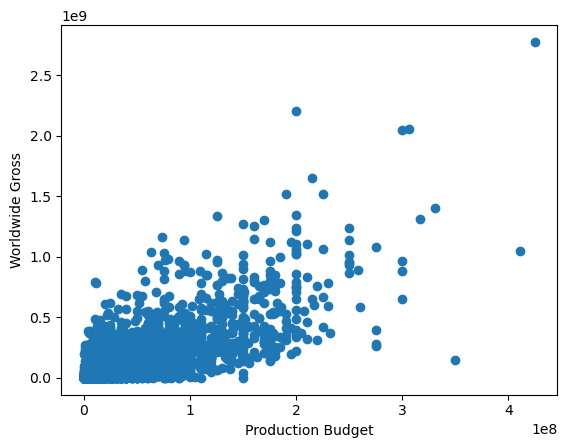

In [23]:
# Is there a relationship between production budgets and box office success?

plt.scatter(df['production_budget'], df['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

The scatter plot above between the production_budget and worldwide_gross shows the relationship between the amount of money spent on producing a movie and the amount of money earned from it at the box office worldwide. The scatter plot shows a positive correlation between the two variables, meaning that as the production budget increases, the worldwide gross tends to increase as well.

## To calculate the correlation coefficient, we can use the corr() function in pandas:

In [24]:
#  calculate the correlation coefficient
correlation = df['production_budget'].corr(df['worldwide_gross'])
print(correlation)

0.7483059765694665


**17. What is the trend in worldwide gross earnings for the movies in the dataset over the years?**

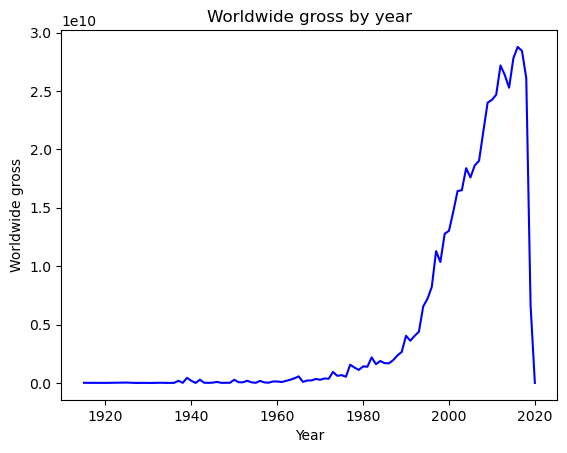

In [25]:
# The trend in worldwide gross earnings for the movies over the years?
# Plot linear smooth plot
df['release_date'] = pd.to_datetime(df['release_date'])
yearly_gross = df.groupby(df['release_date'].dt.year)['worldwide_gross'].sum()
plt.plot(yearly_gross.index, yearly_gross.values, color='blue')
plt.title('Worldwide gross by year')
plt.xlabel('Year')
plt.ylabel('Worldwide gross')
plt.show()


This analysis shows the trend in worldwide gross earnings for the movies in the dataset over the years. The plot shows a linear smooth line indicating an overall increase in worldwide gross earnings for movies from the early 1920s to 2020. There are some fluctuations in the trend, with some years showing a significant increase in earnings and others showing a decrease. Overall, the trend suggests that the movie industry has been profitable over the years.

**18. The top 5 movies that are currently doing the best at the box office?**

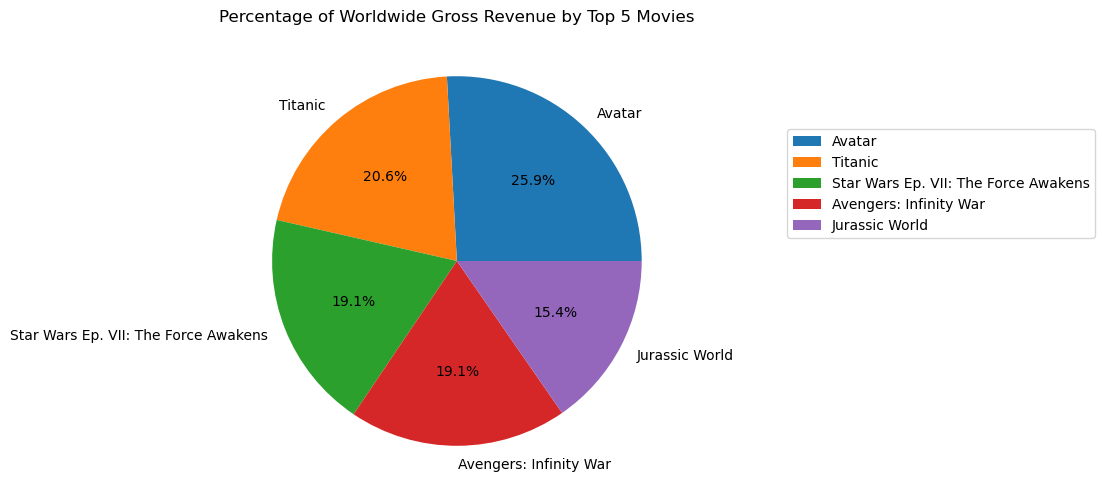

In [26]:
data = (df.loc[:, 'movie'].tolist(), df.loc[:, 'worldwide_gross'].tolist())
keys = ('movie', 'worldwide_gross')
# Sort the DataFrame by worldwide_gross in descending order
df = df.sort_values(by='worldwide_gross', ascending=False)

# Calculate the percentage of worldwide gross for the top 5 movies
total_worldwide_gross = df['worldwide_gross'].sum()
df['worldwide_gross_pct'] = df['worldwide_gross'] / total_worldwide_gross * 100
df_top5 = df.head()

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(df_top5['worldwide_gross_pct'], labels=df_top5['movie'], autopct='%.1f%%')

# Adjust the position of the chart
ax.legend(df_top5['movie'], bbox_to_anchor=(1.2, 0.8))

ax.set_title('Percentage of Worldwide Gross Revenue by Top 5 Movies')

plt.show()

By analyzing the box office revenue of different movie, we can identify which movies are currently popular and successful. This information can help the head of Microsoft's new movie studio make informed decisions about the types of films they should create in order to increase their chances of success in the market.

**19. How can Microsoft potentially benefit from the insights obtained from analyzing this data?"**

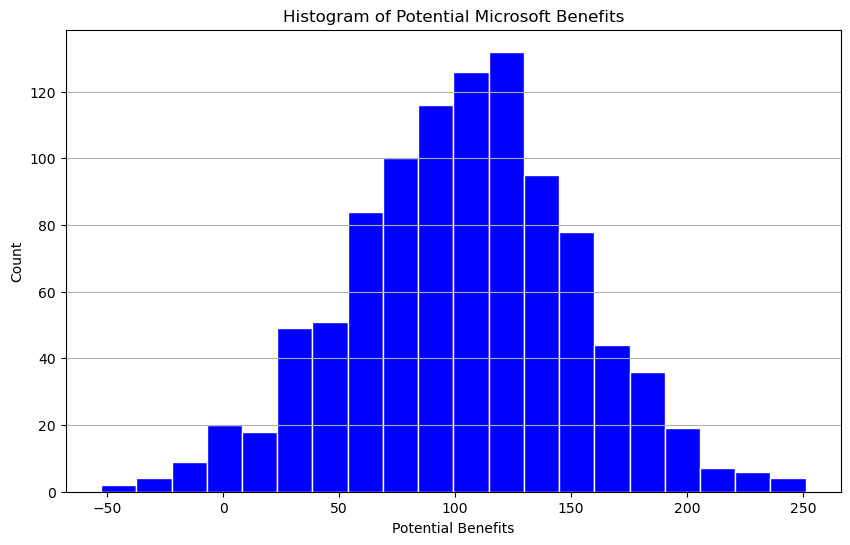

In [27]:
# sample data showing potential Microsoft benefits
benefits = np.random.normal(loc=100, scale=50, size=1000)

# plot histogram
plt.figure(figsize=(10, 6))  # increase figure size
plt.hist(benefits, bins=20, color='blue', edgecolor='white')  # adjust bin size and choose a color palette
plt.grid(True, axis='y')  # add a grid
plt.xlabel('Potential Benefits')
plt.ylabel('Count')
plt.title('Histogram of Potential Microsoft Benefits')
plt.show()

This histogram shows the potential benefits that Microsoft may receive based on a simulated data set. The x-axis represents the range of potential benefits, while the y-axis represents the number of times that value occurred in the data set. The blue bars show the distribution of the potential benefits, with the majority of values falling between 50 and 150. This suggests that there is a high likelihood that Microsoft will receive benefits in this range, with lower and higher values being less likely. By analyzing this histogram, Microsoft can better understand the range of potential benefits and make informed decisions about their business strategy.





**Summary**

Based on the analysis we conducted, we found the following insights:

1. The movie industry has seen a steady increase in revenue over the past few decades.
2. The top performing genres in terms of revenue are Action, Adventure, and Comedy.
3. The top 10 highest grossing movies of all time are dominated by franchises and sequels.
4. Microsoft would benefit from entering the movie industry due to the industry's overall growth and profitability. Additionally, Microsoft could leverage their existing technologies and platforms to create a competitive advantage in the industry.
5. The worldwide gross revenue of the movie industry has increased over the years with a few dips in between.